# __04__ `     MFDataArray    `

#### FloPy stores MODFLOW 6 model data in data objects. 

In [1]:
# Import necessary libraries
# for the purposes of this course we are using frozen versions of flopy to avoid depenecy failures.  
import os 
import sys
sys.path.append('../dependencies/')
import flopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exe_name = os.path.join('..','bin', 'mf6.exe')
org_workspace = os.path.join('..','models','symple_ex01')             # from 01 or 02
workspace = os.path.join('..','models','symple_ex04')
sim = flopy.mf6.MFSimulation.load(sim_name='symple_ex04', exe_name=exe_name, sim_ws=org_workspace)
sim.set_sim_path(workspace)           # ____________________________ # 
gwf = sim.get_model("symp01")

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package rch...
    loading package riv...
    loading package oc...
  loading solution package symp01...


In [3]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package symp01...
  writing model symp01...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package rch...
    writing package riv_0...
    writing package oc...


__Specifying_Array_Data__

In [4]:
pkg_list = gwf.get_package_list()
print(pkg_list)

['DIS', 'IC', 'NPF', 'RCH', 'RIV_0', 'OC']


In [5]:
npf = gwf.get_package('npf')               # option 01 (beta)            # NPF package
npf.k

Layer_1{constant 5.0}
Layer_2{constant 0.1}
Layer_3{constant 10.0}

In [6]:
npf.k33overk = True
npf.k33 = 1

In [7]:
k33_arr = npf.k33.get_data()
k33_arr.shape

(3, 15, 10)

In [8]:
npf.k22overk = True
npf.k22 = [1, 0.1, 2]
npf.k22

Layer_1{constant 1}
Layer_2{constant 0.1}
Layer_3{constant 2}

In [9]:
npf.k22.set_data(3, layer=0)
npf.k22

Layer_1{constant 3}
Layer_2{constant 0.1}
Layer_3{constant 2}

In [10]:
length_units,  nlay,Lx,Ly,  delr,delc = "METERS",   3,1000,1500,   100,100      # print(f'Cell size:{delr} x {delc}')
top, botm = 50, [40, 35, 0]
ncol, nrow = int(Lx/delc) , int(Ly/delr)  
print(f'Number of rows:{nrow}')  
print(f'Number of columns:{ncol}')

Number of rows:15
Number of columns:10


[<Axes: title={'center': 'k layer 1'}>,
 <Axes: title={'center': 'k layer 2'}>,
 <Axes: title={'center': 'k layer 3'}>]

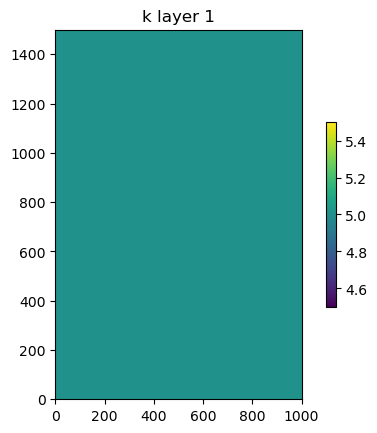

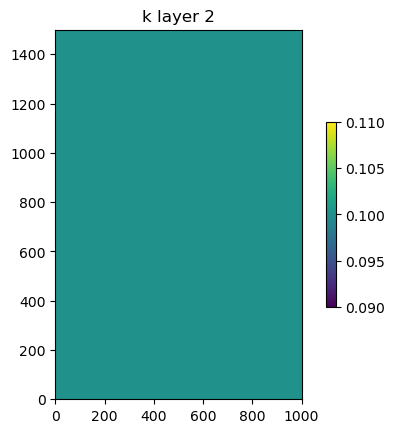

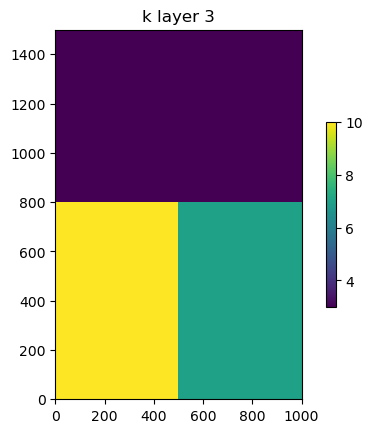

In [11]:
k = np.ones((nlay, nrow, ncol))
k[0] = 5
k[1] = 0.1
k[2] = 10
k[2, :7] = 3
k[2, 7:, 5:] = 7

npf.k = k
npf.k.plot(colorbar=True)

# __Mixed_array_types__

In [12]:
k1 = 5
k2 = np.full((nrow, ncol), 0.1)
k3 = 10
npf.k = [k1, k2, k3]
npf.k

Layer_1{constant 5}
Layer_2{internal}
(array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]))
Layer_3{constant 10}

In [13]:
icelltype = [1, 0, 0]

k1 = 5
k2 = np.full((nrow, ncol), 0.1)
k3 = 10
k = [k1, k2, k3]
k22 = [1, 0.1, 2]
k33 = 0.1
npf = flopy.mf6.ModflowGwfnpf(gwf, icelltype=icelltype,  k=k, k22=k22, k33=k33, k22overk=True, k33overk=True,
                                    save_flows=True, save_specific_discharge=True)

In [14]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package symp01...
  writing model symp01...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package rch...
    writing package riv_0...
    writing package oc...
    writing package npf...
FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to 

(True, [])

# __Transient__

In [15]:
rch_sp1 = 0.000137
rch_sp2 = np.zeros((nrow, ncol)) 
rch_sp2[:7,:] = 0.000274                      # half model domain

rch_spd = {0: rch_sp1, 1: rch_sp2}

rcha = flopy.mf6.ModflowGwfrcha(gwf, pname='rch', recharge=rch_spd)

In [17]:
# rch_spd 

In [22]:
beta = (2,3)
np.zeros(beta)     # https://numpy.org/doc/2.1/reference/generated/numpy.zeros.html

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package symp01...
  writing model symp01...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package riv_0...
    writing package oc...
    writing package npf...
    writing package rch...
FloPy is using the following executable to run the model: ..\..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to 

(True, [])

In [28]:
cbb = gwf.output.budget()
spdis = cbb.get_data(text="SPDIS")[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)

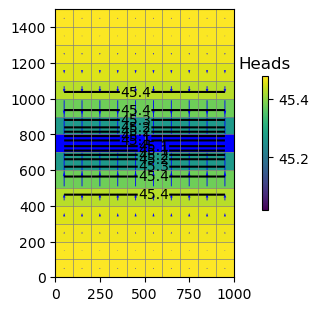

In [29]:
hds = gwf.output.head()
heads = hds.get_alldata()
heads.shape
heads = hds.get_data(idx=0)
heads = hds.get_data(kstpkper=(0,0))
heads = hds.get_data(totim=1)
fig = plt.figure(figsize=(3, 3), constrained_layout=True)
mm = flopy.plot.PlotMapView(model=gwf)
head_array = mm.plot_array(heads)
contours = mm.contour_array(heads, colors='black')
plt.clabel(contours, fmt="%2.1f")
cb = plt.colorbar(head_array, shrink=0.5, )
cb.ax.set_title('Heads')

mm.plot_bc('RIV', color='blue')
mm.plot_grid(lw=0.5)

quiver = mm.plot_vector(qx, qy, normalize=False, color='blue')